# Importing Libs

In [151]:
pip install xgboost

In [152]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Loading Data


In [74]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head(6)

(43040, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
5,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


# Data pre-processing

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [76]:
#Dropping dimentionless diamonds (outliers, impossible to have a 1D or 2D with 0 length)
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
print(df.shape)

(43023, 11)


<AxesSubplot:xlabel='[price]', ylabel='[z]'>

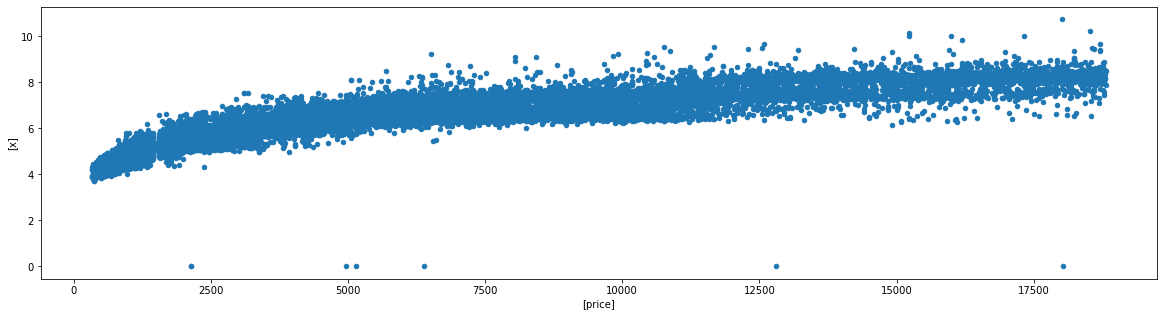

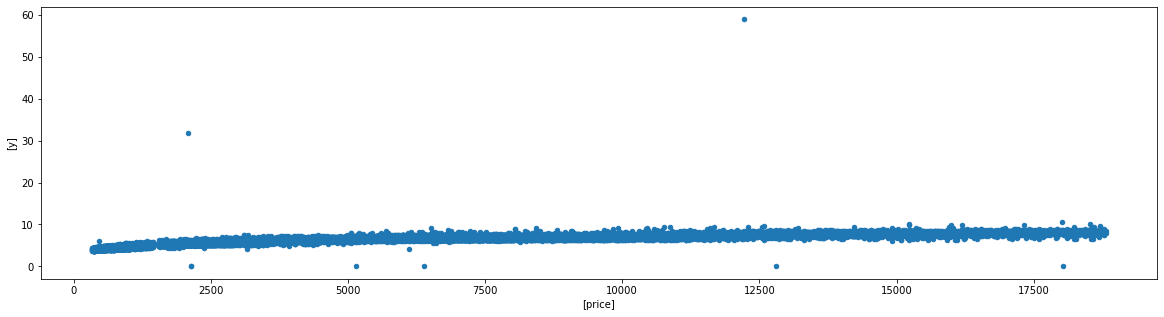

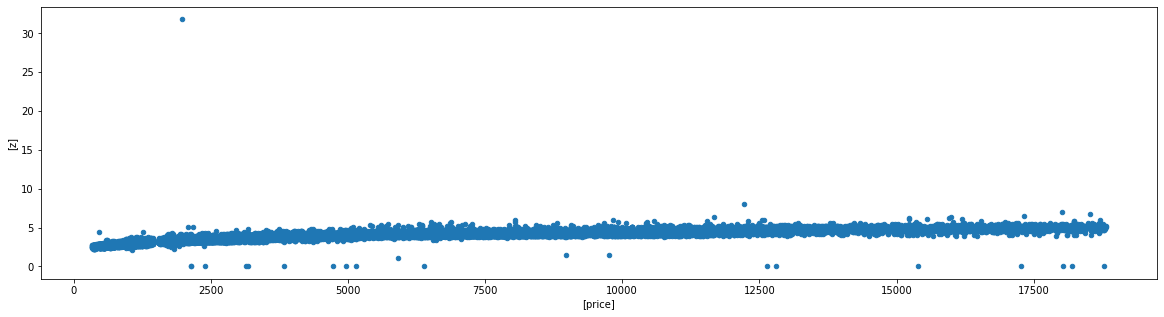

In [211]:
# plotting outliers
df.plot(x=['price'], y=['x'],
        kind="scatter", figsize=(20, 5))
df.plot(x=['price'], y=['y'],
        kind="scatter", figsize=(20, 5))
df.plot(x=['price'], y=['z'],
        kind="scatter", figsize=(20, 5))

In [78]:
#Dropping the outliers.  (doesn't affect my train data, but it could affect on test.csv)
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(data["z"]>2)]
df.shape

C:\Users\Basha\AppData\Local\Temp\ipykernel_11964\2385169578.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(df["z"]<30)&(data["z"]>2)]


(43010, 11)

In [79]:
# Get list of categorical variables
df = data
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [200]:
# One Hot Encoding [better than labeling]
df_new = pd.get_dummies(data=df, columns=['cut', 'clarity', 'color'])
print(df_new.shape)
'''
# Make copy to avoid changing original data 
df_new = df.copy()

# Label Encoding
label_encoder = LabelEncoder()
for col in object_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])
df_new.head()
'''

<bound method NDFrame.head of        Unnamed: 0  carat  depth  table  price     x     y     z  cut_Fair  \
0               2   0.21   59.8   61.0    326  3.89  3.84  2.31         0   
1               4   0.29   62.4   58.0    334  4.20  4.23  2.63         0   
2               5   0.31   63.3   58.0    335  4.34  4.35  2.75         0   
3               6   0.24   62.8   57.0    336  3.94  3.96  2.48         0   
4               7   0.24   62.3   57.0    336  3.95  3.98  2.47         0   
...           ...    ...    ...    ...    ...   ...   ...   ...       ...   
43035       53935   0.72   62.7   59.0   2757  5.69  5.73  3.58         0   
43036       53936   0.72   60.8   57.0   2757  5.75  5.76  3.50         0   
43037       53937   0.72   63.1   55.0   2757  5.69  5.75  3.61         0   
43038       53939   0.86   61.0   58.0   2757  6.15  6.12  3.74         0   
43039       53940   0.75   62.2   55.0   2757  5.83  5.87  3.64         0   

       cut_Good  ...  clarity_VS2  clarity_VV

'\n# Make copy to avoid changing original data \ndf_new = df.copy()\n\n# Label Encoding\nlabel_encoder = LabelEncoder()\nfor col in object_cols:\n    df_new[col] = label_encoder.fit_transform(df_new[col])\ndf_new.head()\n'

In [207]:
X = df_new.drop(['price', 'Unnamed: 0'], axis = 1)
y = df_new['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=31)
X_test.shape

(431, 26)

In [208]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_rf=Pipeline([("scalar",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('rf_classifier', RandomForestRegressor())])

In [209]:
# Model prediction on test data
pred = pipeline_rf.predict(X_test) #BEST I GOT RMSE: 411.85359908571917 /random_state =31 /test_size=0.01

In [210]:
# Model Evaluation
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 411.85359908571917


In [206]:
# Finding the best random_state, it gave me 31
ls = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=i)
    pipeline_rf=Pipeline([("scalar",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])
    pipeline_rf.fit(X_train, y_train)
    pred = pipeline_rf.predict(X_test)
    print(i, "RMSE:",np.sqrt(mean_squared_error(y_test, pred)))
    ls.append(np.sqrt(mean_squared_error(y_test, pred)))
print(min(ls))

0 RMSE: 572.1332722177485
1 RMSE: 493.75916759451803
2 RMSE: 805.1241401736819
3 RMSE: 482.4041327079993
4 RMSE: 509.05626514350797
5 RMSE: 542.0363143655738
6 RMSE: 488.9386712995217
7 RMSE: 615.2865364652193
8 RMSE: 519.0821778610076
9 RMSE: 606.6892217301738
10 RMSE: 497.28921635268057
11 RMSE: 604.6579108503962
12 RMSE: 501.955185114466
13 RMSE: 500.22085022493866
14 RMSE: 584.6179359742442
15 RMSE: 578.45520467051
16 RMSE: 472.9406778530038
17 RMSE: 633.6120770674896
18 RMSE: 531.9281504368925
19 RMSE: 652.8792561034468
20 RMSE: 666.2890881223791
21 RMSE: 473.82745222154745
22 RMSE: 567.2204280151021
23 RMSE: 599.5014335291979
24 RMSE: 574.3937809087527
25 RMSE: 502.90345382697245
26 RMSE: 653.2548578370745
27 RMSE: 537.9358755540454
28 RMSE: 520.8353271709295
29 RMSE: 459.19091470604496
30 RMSE: 592.1337180523459
31 RMSE: 413.71166708570007
32 RMSE: 566.5544138344413
33 RMSE: 613.6736981439177
34 RMSE: 539.9849604507577
35 RMSE: 546.3747137165221
36 RMSE: 523.0584732523702
37 RMS